#Project 5 - On Wednsdays, We Wear Pink

#Introduction

One thing everyone has in common (hopefully), is that we all wear clothes. Except for machines. To help give machines some of the satisfaction of wearing or knowning about clothes, six different models will be created: a Support Vector Machine Classifier, a Random Forest Classifier, an XGBoost Classifier, a
Perceptron, a Multi-Layer Neural Network, and a Convolutional Neural Network.

#Exploratory Data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from matplotlib import pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from matplotlib import pyplot as plt
from random import randint
from matplotlib import pyplot as plt
from random import randint
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/mlData/'
file = path + 'fashiontrain.csv'

fashion1 = pd.read_csv(file)
#fashion.head()
file = path + 'fashiontest.csv'
fashion2 = pd.read_csv(file)


In [ ]:
fashion = fashion1.append(fashion2, ignore_index=True)

In [ ]:
fashion.shape

(70000, 785)

In [ ]:
fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion['label'].describe()

count    70000.000000
mean         4.500000
std          2.872302
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [ ]:
fashion.isnull().any()
fashion.dropna()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
69996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
69997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
69998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
fashionV = fashion
fashionR = fashion
fashionXG = fashion
fashionP = fashion

In my exploration, I decided to combine the train and test data sets from Kaggle into one larger data set and I will split it into train and test data myself. I did this so I could more easily manipulate the data to my prefrences and needs for my generated models. Once the two datasets were added together, they formed a data set of 70,000 rows and 785 columns. Pretty big

#Support Vector Machine

In [ ]:
fashionVx = fashionV.drop(["label"], axis = 1)
fashionVy = fashionV["label"]

In [ ]:
fashionVx.shape

(70000, 784)

In [ ]:
fashionVy.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fashionVx, fashionVy, test_size=0.2, random_state=10)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

fashionSVC = SVC(kernel='rbf', C=1)
fashionSVC.fit(X_train,y_train)

SVC(C=1)

In [ ]:
y_pred = fashionSVC.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1417
           1       0.99      0.98      0.98      1365
           2       0.83      0.83      0.83      1432
           3       0.89      0.93      0.91      1408
           4       0.82      0.85      0.83      1401
           5       0.97      0.95      0.96      1406
           6       0.76      0.67      0.71      1378
           7       0.94      0.95      0.94      1400
           8       0.94      0.98      0.96      1369
           9       0.96      0.95      0.96      1424

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



The support vector machine performed fairly well. The average precision for the 10 different clothes and accessories was 89%. For the simplicity of the model, a precision of 89% is pretty good.

#Random Forest Classification Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
fashionRx = fashionV.drop(["label"], axis = 1)
fashionRy = fashionV["label"]

X_train,X_test,y_train,y_test=train_test_split(fashionRx,fashionRy,test_size=0.2,random_state=10, stratify = fashionRy)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
fashionForest = RandomForestClassifier(n_estimators=101, max_features=500,max_depth=400, random_state=10)
fashionForest.fit(X_train, y_train)
y_pred = fashionForest.predict(X_test)

In [ ]:
print("Accuracy on training set: {:.3f}".format(fashionForest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(fashionForest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


The random forest classification performed with an accuracy of 89%, pretty accurate. This model took 31 minutes to run, which was annoying because it is getting late and I want to go to sleep. This model performed worse than my Support Vector Machine.

#XGBoost Classifier

In [ ]:
import random
import xgboost as xgb

In [ ]:
fashionXGx = fashionXG.drop(["label"], axis = 1)
fashionXGy = fashionXG["label"]

X_train,X_test,y_train,y_test=train_test_split(fashionXGx,fashionXGy,test_size=0.2,random_state=10, stratify = fashionXGy)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 9, alpha = 10, n_estimators = 100)

In [ ]:
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, colsample_bytree=0.3, learning_rate=0.001, max_depth=9,
             objective='reg:squarederror')

In [ ]:
y_pred = xg_reg.predict(X_test)
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  3.73771479698377
Mean Square Error =  20.146877986801428
Root Mean Square Error =  4.4885273739614675


In [ ]:
print("Accuracy on training set: {:.3f}".format(xg_reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xg_reg.score(X_test, y_test)))

Accuracy on training set: -1.437
Accuracy on test set: -1.442


In [ ]:
xg_reg.score(X_train, y_train)

-1.4373661469710317

This thing sucks. With a root mean square error of 4.5 and an an accuracy of -144.2% somehow, this model does awful. Much, much worse than my other models.

#Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

fashionPx = fashionP.drop(["label"], axis = 1)
fashionPy = fashionP["label"]
X_train, X_test, y_train, y_test = train_test_split(fashionPx, fashionPy, test_size=0.2, random_state=11)

In [ ]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [ ]:
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
ppn = Perceptron(max_iter=1785, eta0=0.01, random_state=10)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.01, max_iter=1785, random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = ppn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.79


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1134,   13,   54,   93,    9,   11,   76,    2,   34,    1],
       [   4, 1357,    0,   39,    3,    1,    2,    0,    2,    0],
       [  50,   17, 1048,   46,  116,   11,   99,    1,   16,    0],
       [  39,   40,   34, 1211,   47,   10,   23,    2,    3,    5],
       [   2,   30,  418,   57,  711,    2,  124,    4,   16,    0],
       [   1,    1,    0,    0,    4, 1296,    5,   17,   10,   50],
       [ 218,   21,  276,   76,  109,    6,  638,    2,   46,    0],
       [   0,    0,    0,    0,    1,  270,    1, 1044,    1,  135],
       [   7,    2,   18,   21,   12,   22,   23,    2, 1297,    2],
       [   1,    1,    0,    0,    0,   28,    0,   11,    2, 1306]])

Text(0.5, 320.8, 'Predicted Label')

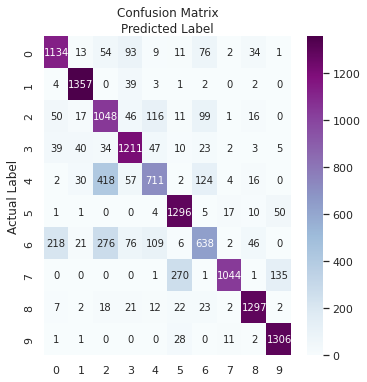

In [ ]:
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots(figsize=(5, 5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

The perceptron performed alright. With an accuracy of 79%. The perceptron model gives me hope for the neural network models. The main flaw of this function was its inability to properly identify shirts. The model mixed up shirts with T-shirts, pullovers, and coats.

#Multi-Layer Neural Network

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
image_size = 784
x_train = x_train.reshape(x_train.shape[0], image_size)
x_test = x_test.reshape(x_test.shape[0], image_size)

In [ ]:
y_train.shape

(60000,)

In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

model.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=16, epochs=50, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

Epoch 1/50
3375/3375 [==============================] - 40s 12ms/step - loss: 1.2947 - accuracy: 0.5774 - val_loss: 0.7864 - val_accuracy: 0.7087
Epoch 2/50
3375/3375 [==============================] - 31s 9ms/step - loss: 0.6856 - accuracy: 0.7509 - val_loss: 0.6280 - val_accuracy: 0.7728
Epoch 3/50
3375/3375 [==============================] - 31s 9ms/step - loss: 0.6226 - accuracy: 0.7748 - val_loss: 0.6185 - val_accuracy: 0.7842
Epoch 4/50
3375/3375 [==============================] - 30s 9ms/step - loss: 0.6221 - accuracy: 0.7783 - val_loss: 0.6254 - val_accuracy: 0.7707
Epoch 5/50
3375/3375 [==============================] - 31s 9ms/step - loss: 0.6304 - accuracy: 0.7723 - val_loss: 0.6379 - val_accuracy: 0.7775
Epoch 6/50
3375/3375 [==============================] - 30s 9ms/step - loss: 0.6428 - accuracy: 0.7658 - val_loss: 0.6403 - val_accuracy: 0.7685
Epoch 7/50
3375/3375 [==============================] - 32s 10ms/step - loss: 0.6639 - accuracy: 0.7560 - val_loss: 0.6500 - val_

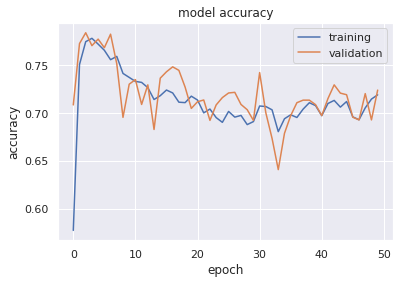

Test loss: 0.796
Test accuracy: 0.709


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

The multi-layer neural network was a bit of a letdown in this case. With a test accuracy of just 71%, it underperformed the perceptron! I think with more tweaking, this model could defenitly perform at a higher accuracy. I was worried about overfitting, but it appears that the model did not overfit because the training and validation graph shows the training and validation scores very similarly.

#Convolutional Neural Network

In [ ]:
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
convLayer01 = Activation('relu')
model.add(convLayer01)

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer02 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
convLayer03 = Activation('relu')
model.add(convLayer03)

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer04 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, y_train, batch_size=128)
test_generator = test_gen.flow(X_test, y_test, batch_size=128)

In [ ]:
model.fit(train_generator, steps_per_epoch=60000//128, epochs=15, verbose=1,
                    validation_data=test_generator, validation_steps=10000//128)


Epoch 1/15
468/468 [==============================] - 182s 388ms/step - loss: 0.4845 - accuracy: 0.8210 - val_loss: 0.4536 - val_accuracy: 0.8370
Epoch 2/15
468/468 [==============================] - 175s 375ms/step - loss: 0.3555 - accuracy: 0.8680 - val_loss: 0.3594 - val_accuracy: 0.8702
Epoch 3/15
468/468 [==============================] - 173s 370ms/step - loss: 0.3167 - accuracy: 0.8823 - val_loss: 0.2929 - val_accuracy: 0.8944
Epoch 4/15
468/468 [==============================] - 174s 371ms/step - loss: 0.2929 - accuracy: 0.8912 - val_loss: 0.2513 - val_accuracy: 0.9097
Epoch 5/15
468/468 [==============================] - 174s 372ms/step - loss: 0.2787 - accuracy: 0.8968 - val_loss: 0.3099 - val_accuracy: 0.8880
Epoch 6/15
468/468 [==============================] - 173s 370ms/step - loss: 0.2648 - accuracy: 0.9019 - val_loss: 0.2375 - val_accuracy: 0.9138
Epoch 7/15
468/468 [==============================] - 174s 371ms/step - loss: 0.2490 - accuracy: 0.9076 - val_loss: 0.2482 -

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 8s 26ms/step - loss: 0.2618 - accuracy: 0.9069
Test score: 0.26182886958122253
Test accuracy: 0.9068999886512756


The convolutional neural network performed pretty good with an accuracy of 91% after running for 47 minutes. After 14 iterations, the accuracy went down on the last epoch which is interesting. With more tweaking, I believe this model would have performed much better, but I do not have the patience.

#Conclusion

Out of the six created models, the best performing one was the convolutional neural network, which makes sense because neural networks are very good at computer vision. The worst performing model was the random forest. I think the decison tree did the worst due to the design of decision trees, making decisions after single pixels does not make the most sense for visual learning and identifying objects in pictures. This project has increased my understanding in the six different types of machine learning models generated.